# Supplement Figures - RNA-seq & ATAC-seq

In [1]:
# set correct working directory -> project folder
getwd()
setwd('..')
getwd()

[1] "/home/sreichl/projects/bmdm-stim/workflow/notebooks"

[1] "/home/sreichl/projects/bmdm-stim"

In [2]:
# library
library(eulerr)

In [3]:
# source the figure theme, libraries and utility functions
source("./src/figure_theme.R")

# configs

In [4]:
# configs
data_RNA <- file.path('results','RNA')
data_ATAC <- file.path('results','ATAC','all')

results_path <- file.path('results','figures','supp_bulk')


# time-series
timeseries_k <- read.csv(file=file.path('config','BMDM_timeseries_k.csv'), row.names=1, header=TRUE)
# enrichment analysis
timeseries_enrichment_terms <- read.csv(file=file.path('config','BMDM_timeseries_enrichment_terms.csv'), row.names=1, header=TRUE)

In [5]:
# make directories if not exist
dir.create(results_path, showWarnings = FALSE, recursive = TRUE)

# Load annotations

In [6]:
# load RNA annotations
RNA_annot <- read.csv(file=file.path('metadata','RNA_sample_metadata.csv'), row.names=1)
dim(RNA_annot)
head(RNA_annot)

[1] 66 10

,library,timepoint.after.thawing,cell_line,Treatment,Treatment_time,mouse_pool,sex,organism,bio.replicate,experiment_id
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
RNA_PT76_R1_C_albicans_2h,Quant-seq,d010,BMDM,C_albicans,2h,PT62_c,female,mouse,R1,PT76
RNA_PT82_R1_C_albicans_24h,Quant-seq,d010,BMDM,C_albicans,24h,PT62_c,female,mouse,R1,PT82
RNA_PT76_R1_C_albicans_4h,Quant-seq,d010,BMDM,C_albicans,4h,PT62_c,female,mouse,R1,PT76
RNA_PT76_R1_C_albicans_6h,Quant-seq,d010,BMDM,C_albicans,6h,PT62_c,female,mouse,R1,PT76
RNA_PT82_R1_C_albicans_8h,Quant-seq,d010,BMDM,C_albicans,8h,PT62_c,female,mouse,R1,PT82
RNA_PT76_R1_untreated_0h,Quant-seq,d010,BMDM,untreated,0h,PT62_c,female,mouse,R1,PT76


In [7]:
RNA_annot[RNA_annot$Treatment=='untreated','Treatment_time'] <- '0h'

In [8]:
# load ATAC annotations
ATAC_annot <- read.csv(file=file.path('metadata','ATAC_sample_metadata.csv'), row.names=1)
dim(ATAC_annot)
head(ATAC_annot)

[1] 78 10

,library,timepoint.after.thawing,cell_line,Treatment,Treatment_time,mouse_pool,sex,bio.replicate,organism,experiment_id
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
PT76_R1_C_albicans_2h,ATAC-seq,d010,BMDM,C_albicans,2h,PT62_c,female,R1,mouse,PT76
PT76_R1_C_albicans_4h,ATAC-seq,d010,BMDM,C_albicans,4h,PT62_c,female,R1,mouse,PT76
PT76_R1_C_albicans_6h,ATAC-seq,d010,BMDM,C_albicans,6h,PT62_c,female,R1,mouse,PT76
PT76_R1_C_albicans_8h,ATAC-seq,d010,BMDM,C_albicans,8h,PT62_c,female,R1,mouse,PT76
PT76_R1_untreated_0h,ATAC-seq,d010,BMDM,untreated,0h,PT62_c,female,R1,mouse,PT76
PT76_R1_IFN_beta_2h,ATAC-seq,d010,BMDM,IFN_beta,2h,PT62_c,female,R1,mouse,PT76


In [9]:
ATAC_annot[ATAC_annot$Treatment=='untreated','Treatment_time'] <- '0h'

In [10]:
# loaded from central theme
treatment_colors

untreated C albicans   IFN beta  IFN gamma  LCMV Cl13       LO28        LPS 
 "#707070"  "#0072B2"  "#D55E00"  "#E69F00"  "#CC79A7"  "#009E73"  "#56B4E9"

In [11]:
# loaded from central theme
time_sizes

0h  2h  4h  6h  8h 24h 
0.5 1.0 2.0 3.0 4.0 5.0

# Unsupervised Analysis

In [12]:
# load RNA data
RNA_PCA_var <- read.csv(file=file.path(data_RNA,'unsupervised_analysis','PCA_normCQN_explained_variance.csv'), row.names=1)
RNA_PCA <- read.csv(file=file.path(data_RNA,'unsupervised_analysis','PCA_normCQN.csv'), row.names=1)
RNA_PCA <- RNA_PCA[,1:2]
colnames(RNA_PCA) <- c('PC_1', 'PC_2')
RNA_PCA$treatment <- RNA_annot[rownames(RNA_PCA),'Treatment']
RNA_PCA$treatment <- str_replace(RNA_PCA$treatment, '_', ' ')
RNA_PCA$time <- RNA_annot[rownames(RNA_PCA),'Treatment_time']
RNA_PCA$time2 <- substr(RNA_PCA$time,1,nchar(RNA_PCA$time)-1)
dim(RNA_PCA)
head(RNA_PCA)

[1] 64  5

,PC_1,PC_2,treatment,time,time2
,<dbl>,<dbl>,<chr>,<chr>,<chr>
RNA_PT82_R1_LO28_24h,30.279577,128.39888,LO28,24h,24
RNA_PT82_R2_LO28_24h,21.348567,132.45559,LO28,24h,24
RNA_PT76_R2_LCMV_Cl13_4h,-58.505778,21.15368,LCMV Cl13,4h,4
RNA_PT76_R1_LO28_6h,91.832055,12.87189,LO28,6h,6
RNA_PT82_R2_untreated_24h,-63.828909,12.63604,untreated,0h,0
RNA_PT82_R2_IFN_beta_24h,-3.448831,87.81184,IFN beta,24h,24


In [13]:
# load ATAC data
ATAC_PCA_var <- read.csv(file=file.path(data_ATAC,'unsupervised_analysis','PCA_all_normCQN_explained_variance.csv'), row.names=1)
ATAC_PCA <- read.csv(file=file.path(data_ATAC,'unsupervised_analysis','PCA_all_normCQN.csv'), row.names=1)
ATAC_PCA <- ATAC_PCA[,1:2]
colnames(ATAC_PCA) <- c('PC_1', 'PC_2')
ATAC_PCA$treatment <- ATAC_annot[rownames(ATAC_PCA),'Treatment']
ATAC_PCA$treatment <- str_replace(ATAC_PCA$treatment, '_', ' ')
ATAC_PCA$time <- ATAC_annot[rownames(ATAC_PCA),'Treatment_time']
ATAC_PCA$time2 <- substr(ATAC_PCA$time,1,nchar(ATAC_PCA$time)-1)
dim(ATAC_PCA)
head(ATAC_PCA)

[1] 78  5

,PC_1,PC_2,treatment,time,time2
,<dbl>,<dbl>,<chr>,<chr>,<chr>
PT76_R1_C_albicans_2h,-83.68200,-133.92047,C albicans,2h,2
PT76_R1_C_albicans_4h,-57.07280,-161.01642,C albicans,4h,4
PT76_R1_C_albicans_6h,-57.57283,-145.46150,C albicans,6h,6
PT76_R1_C_albicans_8h,-54.96527,-129.61160,C albicans,8h,8
PT76_R1_untreated_0h,-194.39197,-52.14000,untreated,0h,0
PT76_R1_IFN_beta_2h,-134.00865,39.36419,IFN beta,2h,2


In [14]:
width <- 5
height <- 4
options(repr.plot.width=width, repr.plot.height=height)

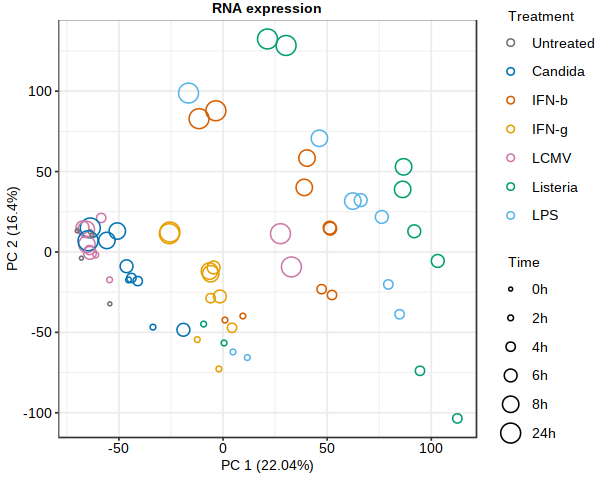

In [18]:
# plot RNA data
RNA_PCA_p <- ggplot(RNA_PCA, aes(x=PC_1, y=PC_2, group=treatment)) +
geom_point(aes(size=time, color=treatment), shape=21, stroke = 0.5) + # for time encoded by size
scale_size_manual(values=time_sizes) +
scale_color_manual(values=treatment_colors, labels=treatment_format, drop=FALSE) +
    xlab(paste0("PC 1 (",round(RNA_PCA_var[1,1]*100,2),"%)")) +    
    ylab(paste0("PC 2 (",round(RNA_PCA_var[2,1]*100,2),"%)")) +  
guides(color=guide_legend(title="Treatment", order=1), size=guide_legend(title="Time", order=2)) +
ggtitle("RNA expression") +
    macro_theme()

RNA_PCA_p

In [19]:
# save plot
ggsave_new(filename="RNA_unsupervised_analysis_PCA",
           results_path=results_path,
           plot=RNA_PCA_p,
           width=width,
           height=height
          )

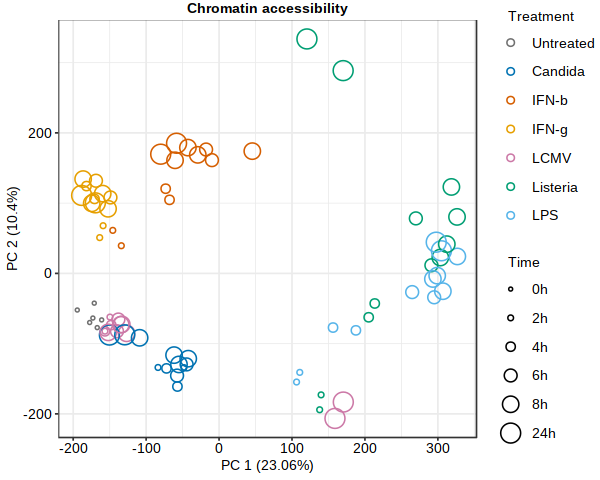

In [21]:
# plot ATAC data
set.seed(42)
ATAC_PCA_p <- ggplot(ATAC_PCA, aes(x=PC_1, y=PC_2, group=treatment)) +
geom_point(aes(size=time, color=treatment), shape=21, stroke = 0.5) +
# geom_jitter(aes(size=time, color=treatment), shape=21, stroke = 0.5, width = 2, height = 0) + # for time encoded by size
scale_size_manual(values=time_sizes) +
scale_color_manual(values=treatment_colors,  labels=treatment_format, drop=FALSE) +
    xlab(paste0("PC 1 (",round(ATAC_PCA_var[1,1]*100,2),"%)")) +    
    ylab(paste0("PC 2 (",round(ATAC_PCA_var[2,1]*100,2),"%)")) +  
guides(color=guide_legend(title="Treatment", order=1), size=guide_legend(title="Time", order=2)) +
ggtitle("Chromatin accessibility") +
    macro_theme()

ATAC_PCA_p

In [22]:
# save plot
ggsave_new(filename="ATAC_unsupervised_analysis_PCA",
           results_path=results_path,
           plot=ATAC_PCA_p,
           width=width,
           height=height
          )

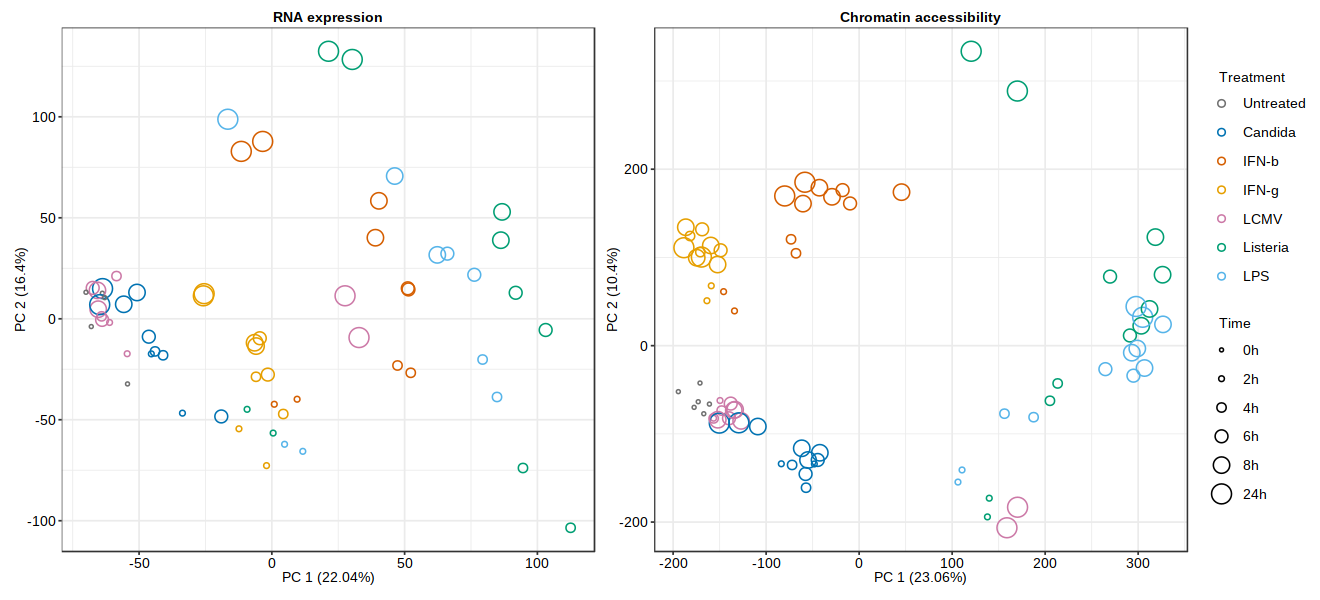

In [23]:
width <- 11
height <- 5

options(repr.plot.width=width, repr.plot.height=height)

panel_unsupervised_analysis <- RNA_PCA_p + theme(legend.position = "none") | ATAC_PCA_p
panel_unsupervised_analysis

In [24]:
# save plot
ggsave_new(filename="BULK_unsupervised_analysis_PCA",
           results_path=results_path,
           plot=panel_unsupervised_analysis,
           width=width,
           height=height
          )

# Differential Analysis - Scatter plot

In [25]:
# load RNA data
RNA_DEA <- read.delim(file=file.path(data_RNA,'DEA','Significant.genes.tsv'), sep = '\t', header = TRUE)
dim(RNA_DEA)
head(RNA_DEA)

[1] 99951    17

,ensembl_gene_id,version,source,external_gene_name,external_gene_source,description,gene_biotype,length,gc,group,logFC,AveExpr,t,P.Value,adj.P.Val,B,direction
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,ENSMUSG00000000028,15,ensembl_havana,Cdc45,MGI Symbol,cell division cycle 45 [Source:MGI Symbol;Acc:MGI:1338073],protein_coding,3506,0.4962921,LPS_8h,-3.472169,3.097686,-5.224250,6.014661e-06,3.276022e-05,3.8304187,down
2,ENSMUSG00000000028,15,ensembl_havana,Cdc45,MGI Symbol,cell division cycle 45 [Source:MGI Symbol;Acc:MGI:1338073],protein_coding,3506,0.4962921,LO28_6h,-2.141904,3.097686,-3.562033,9.812481e-04,2.505076e-03,-1.0748088,down
3,ENSMUSG00000000028,15,ensembl_havana,Cdc45,MGI Symbol,cell division cycle 45 [Source:MGI Symbol;Acc:MGI:1338073],protein_coding,3506,0.4962921,IFN_beta_6h,-1.827678,3.097686,-3.442471,1.380388e-03,3.969044e-03,-1.4727414,down
4,ENSMUSG00000000028,15,ensembl_havana,Cdc45,MGI Symbol,cell division cycle 45 [Source:MGI Symbol;Acc:MGI:1338073],protein_coding,3506,0.4962921,LCMV_Cl13_24h,-1.775335,3.097686,-3.632385,8.009786e-04,4.657678e-03,-0.8547959,down
5,ENSMUSG00000000028,15,ensembl_havana,Cdc45,MGI Symbol,cell division cycle 45 [Source:MGI Symbol;Acc:MGI:1338073],protein_coding,3506,0.4962921,IFN_beta_4h,-1.182338,3.097686,-2.448738,1.888964e-02,4.305215e-02,-3.9544792,down
6,ENSMUSG00000000028,15,ensembl_havana,Cdc45,MGI Symbol,cell division cycle 45 [Source:MGI Symbol;Acc:MGI:1338073],protein_coding,3506,0.4962921,LPS_24h,-4.737483,3.097686,-3.813135,4.722140e-04,3.642916e-03,-0.0977867,down


In [26]:
RNA_DEA_counts <- data.frame(table(paste0(RNA_DEA$group,'_',RNA_DEA$direction)))
colnames(RNA_DEA_counts) <- c('group','gene_count')
dim(RNA_DEA_counts)
head(RNA_DEA_counts)

[1] 52  2

,group,gene_count
,<fct>,<int>
1,C_albicans_24h_up,1
2,C_albicans_2h_down,49
3,C_albicans_2h_up,172
4,C_albicans_4h_down,49
5,C_albicans_4h_up,72
6,C_albicans_6h_down,130


In [27]:
# load ATAC data
ATAC_DEA <- read.delim(file=file.path(data_ATAC,'DEA','Significant.regions.tsv'), sep = '\t', header = TRUE)
dim(ATAC_DEA)
head(ATAC_DEA)

[1] 906135      9

,group,rn,logFC,AveExpr,t,P.Value,adj.P.Val,B,direction
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,C_albicans_2h,CONS00000130796,1.1737837,4.369844,9.827757,2.008776e-15,2.746700e-10,24.58950,up
2,C_albicans_2h,CONS00000032052,1.3161087,4.621430,9.277651,2.412696e-14,1.649500e-09,22.18837,up
3,C_albicans_2h,CONS00000181342,0.8823945,5.109763,9.120974,4.906553e-14,2.236325e-09,21.59656,up
4,C_albicans_2h,CONS00000021736,1.1249054,5.030621,8.978311,9.368332e-14,2.628066e-09,20.93968,up
5,C_albicans_2h,CONS00000173048,1.1362798,3.910130,8.938770,1.120819e-13,2.628066e-09,20.76723,up
6,C_albicans_2h,CONS00000017578,1.1454787,4.607287,8.932488,1.153208e-13,2.628066e-09,20.74454,up


In [28]:
ATAC_DEA_counts <- data.frame(table(paste0(ATAC_DEA$group,'_',ATAC_DEA$direction)))
colnames(ATAC_DEA_counts) <- c('group','region_count')
dim(ATAC_DEA_counts)
head(ATAC_DEA_counts)

[1] 51  2

,group,region_count
,<fct>,<int>
1,C_albicans_2h_down,448
2,C_albicans_2h_up,2005
3,C_albicans_4h_down,280
4,C_albicans_4h_up,1058
5,C_albicans_6h_down,262
6,C_albicans_6h_up,1425


In [29]:
# merge count tables & fill NA with 0
DEA_counts <- merge(RNA_DEA_counts, ATAC_DEA_counts , by="group", all = TRUE)

DEA_counts[is.na(DEA_counts)] <- 0

DEA_counts$time <- lapply(DEA_counts$group, function(x) tail(str_split(x, '_')[[1]], n=2)[1])
DEA_counts$time <- paste0(DEA_counts$time)
DEA_counts$time2 <- substr(DEA_counts$time,1,nchar(DEA_counts$time)-1)

DEA_counts$direction <- lapply(DEA_counts$group, function(x) as.character(tail(str_split(x, '_')[[1]], n=2)[2]))
DEA_counts$direction <- paste0(DEA_counts$direction)
DEA_counts$direction2 <- ifelse(DEA_counts$direction=='up', '^', 'v')
                              
DEA_counts$treatment <- str_remove(DEA_counts$group, paste0('_',DEA_counts$time,'_',DEA_counts$direction))
DEA_counts$treatment <- str_replace(DEA_counts$treatment, '_', ' ')
                             
DEA_counts$time3 <- paste0(DEA_counts$time2, DEA_counts$direction2)

dim(DEA_counts)
head(DEA_counts)

[1] 53  9

,group,gene_count,region_count,time,time2,direction,direction2,treatment,time3
,<fct>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,C_albicans_24h_up,1,0,24h,24,up,^,C albicans,24^
2,C_albicans_2h_down,49,448,2h,2,down,v,C albicans,2v
3,C_albicans_2h_up,172,2005,2h,2,up,^,C albicans,2^
4,C_albicans_4h_down,49,280,4h,4,down,v,C albicans,4v
5,C_albicans_4h_up,72,1058,4h,4,up,^,C albicans,4^
6,C_albicans_6h_down,130,262,6h,6,down,v,C albicans,6v


In [30]:
treatment_colors['up'] <- '#FF0000'
treatment_colors['down'] <- '#00008B'

In [36]:
treatment_colors[-1]

C albicans   IFN beta  IFN gamma  LCMV Cl13       LO28        LPS         up 
 "#0072B2"  "#D55E00"  "#E69F00"  "#CC79A7"  "#009E73"  "#56B4E9"  "#FF0000" 
      down 
 "#00008B"

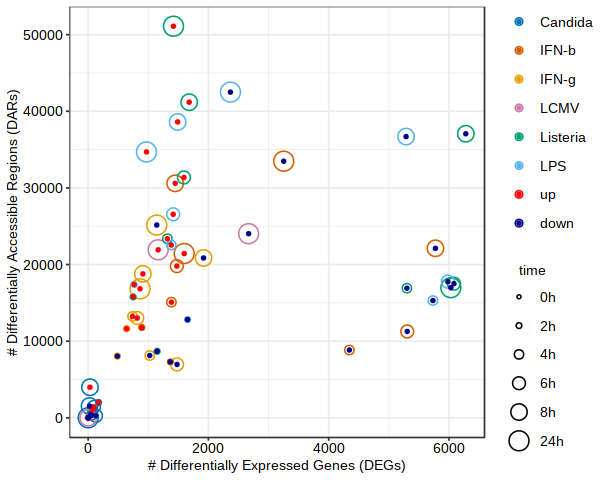

In [37]:
# plot DEA counts
width <- 5
height <- 4

options(repr.plot.width=width, repr.plot.height=height)

DEA_counts_p <- ggplot(DEA_counts, aes(x=gene_count, y=region_count, group=treatment)) +
geom_point(aes(size=time, color=treatment), shape=21, stroke = 0.5) + # for time encoded by size
scale_size_manual(values=time_sizes) +
scale_color_manual(values=treatment_colors[-1], labels=treatment_format, drop=TRUE) +
geom_point(aes(color=direction), size=0.5, shape=19, alpha=1) +
 labs(x = "# Differentially Expressed Genes (DEGs)",
      y = "# Differentially Accessible Regions (DARs)",
      color = "direction") +
guides(color=guide_legend(title="Treatment", order=1), shape=guide_legend(title="Time", order=2)) +
    macro_theme()

DEA_counts_p

In [38]:
# save plot
ggsave_new(filename="BULK_DEA_counts",
           results_path=results_path,
           plot=DEA_counts_p,
           width=width,
           height=height
          )

# ATAC-seq region annotation distribution

In [39]:
# load region annotations
region_annot <- read.delim(file=file.path(data_ATAC,'all_consensus_regions_annotation_filtered.csv'), sep=',', header = TRUE, row.names=1)
region_annot$homer_Annotation <- lapply(region_annot$homer_Annotation, function(x) strsplit(x," \\(")[[1]][1])
region_annot$homer_Annotation <- paste0(region_annot$homer_Annotation)
dim(region_annot)
head(region_annot)

[1] 136735     25

,gencode_chr,gencode_start,gencode_end,gencode_length,gencode_feat_anchor,gencode_distance,gencode_location,gencode_feat_type,gencode_gene_id,gencode_gene_name,⋯,homer_Entrez.ID,homer_Nearest.Unigene,homer_Nearest.Refseq,homer_Nearest.Ensembl,homer_Gene.Name,homer_Gene.Alias,homer_Gene.Description,homer_Gene.Type,regulatoryBuild_reg_feature,regulatoryBuild_reg_feature_id
,<chr>,<int>,<int>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
CONS00000000005,chr1,4414052,4415256,1204,start,5413,Upstream,gene:protein_coding,ENSMUSG00000025900.13,Rp1,⋯,19888,Mm.294263,NM_011283,ENSMUSG00000025900,Rp1,Dcdc3|Gm38717|Orp1|Rp1h|mG145,retinitis pigmentosa 1 (human),protein-coding,reg_NONE,
CONS00000000006,chr1,4416568,4417221,653,start,7653,Upstream,gene:protein_coding,ENSMUSG00000025900.13,Rp1,⋯,19888,Mm.294263,NM_011283,ENSMUSG00000025900,Rp1,Dcdc3|Gm38717|Orp1|Rp1h|mG145,retinitis pigmentosa 1 (human),protein-coding,regulatory_region,ENSMUSR00000293483
CONS00000000011,chr1,4491871,4492835,964,end,1423,PeakInsideFeature,gene:protein_coding,ENSMUSG00000025902.13,Sox17,⋯,20671,Mm.279103,NM_011441,ENSMUSG00000025902,Sox17,-,SRY (sex determining region Y)-box 17,protein-coding,regulatory_region,ENSMUSR00000293490
CONS00000000013,chr1,4622075,4622934,859,start,125150,Upstream,gene:protein_coding,ENSMUSG00000025902.13,Sox17,⋯,20671,Mm.279103,NM_011441,ENSMUSG00000025902,Sox17,-,SRY (sex determining region Y)-box 17,protein-coding,regulatory_region,ENSMUSR00000476227
CONS00000000017,chr1,4755824,4756551,727,start,29552,Downstream,gene:protein_coding,ENSMUSG00000033845.13,Mrpl15,⋯,27395,Mm.182927,NM_025300,ENSMUSG00000033845,Mrpl15,HSPC145|MRP-L7|Rpml7,mitochondrial ribosomal protein L15,protein-coding,reg_NONE,
CONS00000000020,chr1,4768266,4768898,632,start,17157,Downstream,gene:protein_coding,ENSMUSG00000033845.13,Mrpl15,⋯,27395,Mm.182927,NM_025300,ENSMUSG00000033845,Mrpl15,HSPC145|MRP-L7|Rpml7,mitochondrial ribosomal protein L15,protein-coding,regulatory_region,ENSMUSR00000293514


In [40]:
# load ATAC DEA results
atac_dea <- read.delim(file=file.path(data_ATAC,'DEA','Significant.regions.tsv'), sep='\t', header = TRUE)
dim(atac_dea)
head(atac_dea)

[1] 906135      9

,group,rn,logFC,AveExpr,t,P.Value,adj.P.Val,B,direction
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,C_albicans_2h,CONS00000130796,1.1737837,4.369844,9.827757,2.008776e-15,2.746700e-10,24.58950,up
2,C_albicans_2h,CONS00000032052,1.3161087,4.621430,9.277651,2.412696e-14,1.649500e-09,22.18837,up
3,C_albicans_2h,CONS00000181342,0.8823945,5.109763,9.120974,4.906553e-14,2.236325e-09,21.59656,up
4,C_albicans_2h,CONS00000021736,1.1249054,5.030621,8.978311,9.368332e-14,2.628066e-09,20.93968,up
5,C_albicans_2h,CONS00000173048,1.1362798,3.910130,8.938770,1.120819e-13,2.628066e-09,20.76723,up
6,C_albicans_2h,CONS00000017578,1.1454787,4.607287,8.932488,1.153208e-13,2.628066e-09,20.74454,up


In [41]:
# filter for stat. sign. and effect size
atac_dea <- atac_dea[(atac_dea$adj.P.Val<0.05) & (abs(atac_dea$logFC)>2) & (atac_dea$AveExpr>0), ]
dim(atac_dea)
head(atac_dea)

[1] 70801     9

,group,rn,logFC,AveExpr,t,P.Value,adj.P.Val,B,direction
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
12,C_albicans_2h,CONS00000003577,2.027163,3.356042,8.242825,2.629861e-12,2.996617e-08,17.37412,up
16,C_albicans_2h,CONS00000130801,2.041275,2.720291,8.054457,6.167497e-12,5.622085e-08,16.62792,up
30,C_albicans_2h,CONS00000029769,2.024547,2.431062,7.736048,2.595284e-11,1.364870e-07,14.77462,up
42,C_albicans_2h,CONS00000101018,2.053408,2.274132,7.433932,1.008300e-10,3.746209e-07,13.57290,up
59,C_albicans_2h,CONS00000033602,2.086051,1.651338,7.231989,2.486541e-10,7.233981e-07,12.30219,up
74,C_albicans_2h,CONS00000102612,2.265512,2.256551,6.930506,9.486935e-10,1.965449e-06,11.38307,up


## all statistical significant DARs

In [42]:
# make data table for plot
atac_dea$homer_Annotation <- region_annot[atac_dea$rn, 'homer_Annotation']
atac_dea_table <- data.table(table(atac_dea[,c('group','direction','homer_Annotation')]))
# make group factor and order chronological

times <- names(time_colors)[-1]
treatments <- str_replace_all(names(treatment_colors)[-1], ' ', '_')
treatments <- treatments[treatments!='up' & treatments!='down']

atac_dea_table$group <- factor(atac_dea_table$group, levels = paste(rep(treatments, each = length(times)), times, sep = "_"))

In [43]:
width <- 8
height <- 2.5
options(repr.plot.width=width, repr.plot.height=height)

In [44]:
for (directionx in c('up', 'down')){
    for (position in c('stack', 'fill')){
    
        # stacked barplot
        region_p <- ggplot() + 
        geom_bar(data=atac_dea_table[direction==directionx], aes(fill=homer_Annotation, y=N, x=group), position=position, stat="identity") +
        ggtitle(paste0("Genomic Region Annotation of DARs ",directionx)) +
        macro_theme() + 
        theme(axis.text.x = element_text(angle = 45, hjust = 1, vjust=1),
              axis.title.x=element_blank(),
              axis.title.y=element_blank())

    #     print(region_p)

        # save plot
        ggsave_new(filename=paste0("ATAC_region_annotation_DAR_",directionx,"_",position),
                   results_path=results_path,
                   plot=region_p,
                   width=width,
                   height=height
                  )
    }
}

Warning message:
“Removed 8 rows containing missing values (geom_bar).”
Warning message:
“Removed 8 rows containing missing values (geom_bar).”


## ONLY top 1% of all DARs

In [45]:
# keep only top 1% for each group by effect-size
atac_dea_top <- data.frame()
for (groupx in unique(atac_dea$group)){
    group_dea_table <- atac_dea[atac_dea$group==groupx,]
    top_n <- ceiling(dim(group_dea_table)[1]*0.01)

    group_dea_table <- group_dea_table[order(abs(group_dea_table$logFC), decreasing = TRUE)[1:top_n],]

    if (dim(atac_dea_top)[1]==0){
        atac_dea_top <- group_dea_table
    }else{
        atac_dea_top <- rbind(atac_dea_top, group_dea_table)
    }  
}

In [46]:
# make data table for plot
atac_dea_top_table <- data.table(table(atac_dea_top[,c('group','direction','homer_Annotation')]))
# make group factor and order chronological
atac_dea_top_table$group <- factor(atac_dea_top_table$group, levels = paste(rep(treatments, each = length(times)), times, sep = "_"))

In [47]:
for (directionx in c('up', 'down')){
    for (position in c('stack', 'fill')){
    
        # stacked barplot
        region_p <- ggplot() + 
        geom_bar(data=atac_dea_top_table[direction==directionx], aes(fill=homer_Annotation, y=N, x=group), position=position, stat="identity") +
        ggtitle(paste0("Genomic Region Annotation of top 1% DARs ",directionx)) +
        macro_theme() + 
        theme(axis.text.x = element_text(angle = 45, hjust = 1, vjust=1),
              axis.title.x=element_blank(),
              axis.title.y=element_blank())

    #     print(region_p)

        # save plot
        ggsave_new(filename=paste0("ATAC_region_annotation_DAR_top_",directionx,"_",position),
                   results_path=results_path,
                   plot=region_p,
                   width=width,
                   height=height
                  )
    }
}

Warning message:
“Removed 14 rows containing missing values (geom_bar).”
Warning message:
“Removed 14 rows containing missing values (geom_bar).”
Warning message:
“Removed 133 rows containing missing values (geom_bar).”
Warning message:
“Removed 133 rows containing missing values (geom_bar).”


## accesible region distributions

In [48]:
# load ATAC data
atac_data <- read.delim(file=file.path(data_ATAC,'all_filtered.csv'), sep=',', header = TRUE, row.names=1)
dim(atac_data)
head(atac_data)

[1] 136735     78

,PT76_R1_C_albicans_2h,PT76_R1_C_albicans_4h,PT76_R1_C_albicans_6h,PT76_R1_C_albicans_8h,PT76_R1_untreated_0h,PT76_R1_IFN_beta_2h,PT76_R1_IFN_beta_4h,PT76_R1_IFN_beta_6h,PT76_R1_IFN_beta_8h,PT76_R1_IFN_gamma_2h,⋯,PT82_R2_IFN_gamma_24h,PT82_R2_IFN_gamma_8h,PT82_R2_LCMV_Cl13_24h,PT82_R2_LCMV_Cl13_8h,PT82_R2_LO28_24h,PT82_R2_LO28_8h,PT82_R2_LPS_24h,PT82_R2_LPS_8h,PT82_R2_untreated_24h,PT82_R2_untreated_8h
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
CONS00000000005,47,55,65,44,60,21,19,37,43,14,⋯,50,40,229,120,22,115,114,97,122,96
CONS00000000006,8,8,13,8,6,8,4,4,7,10,⋯,25,22,41,24,6,15,11,15,24,7
CONS00000000011,8,4,3,9,9,11,10,2,5,13,⋯,8,21,7,18,18,11,4,19,18,21
CONS00000000013,3,8,8,3,3,4,2,0,4,3,⋯,2,5,15,1,6,19,7,25,1,6
CONS00000000017,3,3,2,5,6,4,4,9,8,5,⋯,6,9,19,8,6,9,7,12,7,14
CONS00000000020,2,4,6,3,9,3,5,4,5,8,⋯,8,9,10,14,3,8,5,9,10,7


In [49]:
ATAC_annot$group <- paste0(ATAC_annot$Treatment, '_',ATAC_annot$Treatment_time)

In [50]:
groups <- c("untreated_0h", paste(rep(treatments, each = length(times)), times, sep = "_"))

In [51]:
atac_data_mean <- data.frame()

for(group in groups){
    
    if(dim(atac_data_mean)[1]==0){
        atac_data_mean <- setNames(data.frame(rowMeans(atac_data[, rownames(ATAC_annot)[ATAC_annot$group==group]])), group)
    }else{
        atac_data_mean[,group] <- rowMeans(atac_data[, rownames(ATAC_annot)[ATAC_annot$group==group]])
    }
}

In [52]:
mean_table <- reshape2::melt(t(atac_data_mean))
colnames(mean_table) <- c('group','region','value')

In [53]:
# filter for expression
mean_table <- mean_table[mean_table$value>0,]

In [54]:
# add annotation
mean_table$homer_Annotation <- region_annot[mean_table$region, 'homer_Annotation']

In [55]:
# get counts
mean_table <- data.table(table(mean_table[,c('group','homer_Annotation')]))

In [56]:
# sort groups
mean_table$group <- factor(mean_table$group, levels = groups)

In [57]:
for (position in c('stack', 'fill')){

    # stacked barplot
    region_p <- ggplot() + 
    geom_bar(data=mean_table, aes(fill=homer_Annotation, y=N, x=group), position=position, stat="identity") +
    ggtitle(paste0("Genomic Region Annotation of accessible regions ")) +
    macro_theme() + 
    theme(axis.text.x = element_text(angle = 45, hjust = 1, vjust=1),
          axis.title.x=element_blank(),
          axis.title.y=element_blank())

#     print(region_p)

    # save plot
    ggsave_new(filename=paste0("ATAC_region_annotation_accessible_",position),
               results_path=results_path,
               plot=region_p,
               width=width,
               height=height
              )
}

# DEG Euler diagrams

In [26]:
times <- names(time_colors)[-1]
treatments <- str_replace_all(names(treatment_colors)[-1], ' ', '_')
treatments <- treatments[(treatments!='up') & (treatments!='down')]

In [13]:
# load RNA DEA results
rna_dea <- read.delim(file=file.path(data_RNA,'DEA','Significant.genes.tsv'), sep='\t', header = TRUE)
dim(rna_dea)
head(rna_dea)

[1] 99951    17

,ensembl_gene_id,version,source,external_gene_name,external_gene_source,description,gene_biotype,length,gc,group,logFC,AveExpr,t,P.Value,adj.P.Val,B,direction
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,ENSMUSG00000000028,15,ensembl_havana,Cdc45,MGI Symbol,cell division cycle 45 [Source:MGI Symbol;Acc:MGI:1338073],protein_coding,3506,0.4962921,LPS_8h,-3.472169,3.097686,-5.224250,6.014661e-06,3.276022e-05,3.8304187,down
2,ENSMUSG00000000028,15,ensembl_havana,Cdc45,MGI Symbol,cell division cycle 45 [Source:MGI Symbol;Acc:MGI:1338073],protein_coding,3506,0.4962921,LO28_6h,-2.141904,3.097686,-3.562033,9.812481e-04,2.505076e-03,-1.0748088,down
3,ENSMUSG00000000028,15,ensembl_havana,Cdc45,MGI Symbol,cell division cycle 45 [Source:MGI Symbol;Acc:MGI:1338073],protein_coding,3506,0.4962921,IFN_beta_6h,-1.827678,3.097686,-3.442471,1.380388e-03,3.969044e-03,-1.4727414,down
4,ENSMUSG00000000028,15,ensembl_havana,Cdc45,MGI Symbol,cell division cycle 45 [Source:MGI Symbol;Acc:MGI:1338073],protein_coding,3506,0.4962921,LCMV_Cl13_24h,-1.775335,3.097686,-3.632385,8.009786e-04,4.657678e-03,-0.8547959,down
5,ENSMUSG00000000028,15,ensembl_havana,Cdc45,MGI Symbol,cell division cycle 45 [Source:MGI Symbol;Acc:MGI:1338073],protein_coding,3506,0.4962921,IFN_beta_4h,-1.182338,3.097686,-2.448738,1.888964e-02,4.305215e-02,-3.9544792,down
6,ENSMUSG00000000028,15,ensembl_havana,Cdc45,MGI Symbol,cell division cycle 45 [Source:MGI Symbol;Acc:MGI:1338073],protein_coding,3506,0.4962921,LPS_24h,-4.737483,3.097686,-3.813135,4.722140e-04,3.642916e-03,-0.0977867,down


In [14]:
# filter for stat. sign. and effect size
rna_dea <- rna_dea[(rna_dea$adj.P.Val<0.05) & (abs(rna_dea$logFC)>2) & (rna_dea$AveExpr>1), ]
dim(rna_dea)
head(rna_dea)

[1] 22056    17

,ensembl_gene_id,version,source,external_gene_name,external_gene_source,description,gene_biotype,length,gc,group,logFC,AveExpr,t,P.Value,adj.P.Val,B,direction
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,ENSMUSG00000000028,15,ensembl_havana,Cdc45,MGI Symbol,cell division cycle 45 [Source:MGI Symbol;Acc:MGI:1338073],protein_coding,3506,0.4962921,LPS_8h,-3.472169,3.097686,-5.224250,6.014661e-06,3.276022e-05,3.8304187,down
2,ENSMUSG00000000028,15,ensembl_havana,Cdc45,MGI Symbol,cell division cycle 45 [Source:MGI Symbol;Acc:MGI:1338073],protein_coding,3506,0.4962921,LO28_6h,-2.141904,3.097686,-3.562033,9.812481e-04,2.505076e-03,-1.0748088,down
6,ENSMUSG00000000028,15,ensembl_havana,Cdc45,MGI Symbol,cell division cycle 45 [Source:MGI Symbol;Acc:MGI:1338073],protein_coding,3506,0.4962921,LPS_24h,-4.737483,3.097686,-3.813135,4.722140e-04,3.642916e-03,-0.0977867,down
8,ENSMUSG00000000028,15,ensembl_havana,Cdc45,MGI Symbol,cell division cycle 45 [Source:MGI Symbol;Acc:MGI:1338073],protein_coding,3506,0.4962921,LO28_24h,-4.461169,3.097686,-4.902902,1.667343e-05,7.382125e-05,2.9286268,down
10,ENSMUSG00000000028,15,ensembl_havana,Cdc45,MGI Symbol,cell division cycle 45 [Source:MGI Symbol;Acc:MGI:1338073],protein_coding,3506,0.4962921,LO28_8h,-2.995553,3.097686,-4.786143,2.408588e-05,9.100302e-05,2.4851817,down
12,ENSMUSG00000000028,15,ensembl_havana,Cdc45,MGI Symbol,cell division cycle 45 [Source:MGI Symbol;Acc:MGI:1338073],protein_coding,3506,0.4962921,LPS_6h,-3.695352,3.097686,-4.706786,3.089620e-05,1.338590e-04,2.3237962,down


In [15]:
dea_treatments <- data.frame(matrix(ncol = 0, nrow = length(unique(rna_dea$external_gene_name))))
rownames(dea_treatments) <- unique(rna_dea$external_gene_name)
for (treatment in treatments){
    treatment_genes <- unique(rna_dea[grepl(treatment, rna_dea$group, fixed = TRUE),'external_gene_name'])
    dea_treatments[treatment_genes, treatment] <- TRUE
}
dea_treatments[is.na(dea_treatments)] <- FALSE

In [16]:
# in LCMV, LPS or LO28
dea_treatments$LCMV_LPS_LO28 <- dea_treatments$LCMV_Cl13 | dea_treatments$LPS | dea_treatments$LO28

In [17]:
# in LCMV, LPS or LO28 but NOT in IFN-beta
dea_treatments$LCMV_LPS_LO28_notIFN_beta <- (dea_treatments$LCMV_LPS_LO28) & !(dea_treatments$IFN_beta)

In [18]:
dim(dea_treatments)
head(dea_treatments)

[1] 4756    8

,C_albicans,IFN_beta,IFN_gamma,LCMV_Cl13,LO28,LPS,LCMV_LPS_LO28,LCMV_LPS_LO28_notIFN_beta
,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
Cdc45,FALSE,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE,FALSE
Narf,FALSE,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE,FALSE
Cav2,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE
Scmh1,FALSE,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE,FALSE
Brat1,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE,TRUE,FALSE
Gna12,FALSE,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE,FALSE


In [57]:
# save dataframe
write.csv(dea_treatments, file.path(results_path, "RNA_DEG_euler.csv"))

In [58]:
set.seed(42)

In [59]:
svg(filename=file.path(results_path, "RNA_DEG_euler_all.svg"), width = 10, height = 10)

dea_fit <- euler(dea_treatments[c('C_albicans','IFN_beta','IFN_gamma','LCMV_Cl13','LPS','LO28')],shape = "ellipse")
plot(dea_fit, quantities = TRUE)

dev.off()

png 
  2

In [60]:
svg(filename=file.path(results_path, "RNA_DEG_euler_LCMV_LPS_LO28.svg"), width = 4, height = 4)

dea_fit <- euler(dea_treatments[c('LCMV_Cl13','LPS','LO28')],shape = "ellipse")
plot(dea_fit, quantities = TRUE)

dev.off()

png 
  2

In [19]:
svg(filename=file.path(results_path, "RNA_DEG_euler_LCMV+LPS+LO28_IFN_beta.svg"), width = 4, height = 4)

dea_fit <- euler(dea_treatments[c('LCMV_LPS_LO28', 'IFN_beta')], shape = "ellipse")
plot(dea_fit, quantities = TRUE)

dev.off()

png 
  2

In [62]:
svg(filename=file.path(results_path, "RNA_DEG_euler_LCMV+LPS+LO28_notIFN_beta.svg"), width = 4, height = 4)

dea_fit <- euler(dea_treatments[c('LCMV_LPS_LO28_notIFN_beta', 'IFN_beta')],shape = "ellipse")
plot(dea_fit,quantities = TRUE)

dev.off()

png 
  2

# Time Series - Enrichment Analysis per Treatment

## RNA

In [89]:
# mode <- 'selected' #'data_driven'
# treatment <- 'LO28'

In [90]:
for (mode in c('data_driven')){ #'selected',
    
    mode_plots <- list()
    heights <- list()
    
    for (treatment in unique(RNA_annot$Treatment)){
        if (treatment=='untreated'){
            next
        }
    
        # configs
        k_RNA <- timeseries_k[treatment, 'RNA']
        # relevant only for data driven
        top_n <- ceiling(25/k_RNA)

        db <- timeseries_enrichment_terms[treatment, 'RNA_database']

        if (mode=='data_driven'){
            # load adjusted p-values & select most significant terms for each cluster
            tmp_adjpvalues <- read.delim(file=file.path(data_RNA, 
                                                         "enrichment_analysis", 
                                                         "time_series", 
                                                         treatment, 
                                                         paste0('k_', k_RNA), 
                                                         paste0('summary_',db,'_adjpvalues.csv')
                                                        ), 
                                          sep=',', header = TRUE, row.names=1)

            # remove all columns with not one single significant hit
            tmp_adjpvalues <- tmp_adjpvalues[,colSums(is.na(tmp_adjpvalues))<nrow(tmp_adjpvalues)]

            # identify most significant term per group
            #tmp_terms <- unique(as.vector(sapply(tmp_adjpvalues, function(x) rownames(tmp_adjpvalues)[sort(x, index.return = TRUE)$ix][1:top_n])))
            #unique(sapply(tmp_adjpvalues, function(x) rownames(tmp_adjpvalues)[sort(x, index.return = TRUE)$ix][1:top_n]))
            tmp_terms <- unique(as.vector(sapply(tmp_adjpvalues, function(x) rownames(tmp_adjpvalues)[order(x)][1:top_n])))


            # load odds ratios of enrichment results
            tmp_enrichments <- read.delim(file=file.path(data_RNA, 
                                                         "enrichment_analysis", 
                                                         "time_series", 
                                                         treatment, 
                                                         paste0('k_', k_RNA), 
                                                         paste0('summary_',db,'_oddsratio.csv')
                                                        ), 
                                          sep=',', header = TRUE, row.names=1)

            # filter by selected enrichment terms
            tmp_enrichments <- tmp_enrichments[tmp_terms,]
        }

        if (mode=='selected'){
            # load odds ratios of enrichment results
            tmp_enrichments <- read.delim(file=file.path(data_RNA, 
                                                         "enrichment_analysis", 
                                                         "time_series", 
                                                         treatment, 
                                                         paste0('k_', k_RNA), 
                                                         paste0('summary_',db,'_oddsratio.csv')
                                                        ), 
                                          sep=',', header = TRUE, row.names=1)

            tmp_terms <- unique(str_split(string = timeseries_enrichment_terms[treatment,'RNA_terms'], pattern = ' \\| ')[[1]])

            # filter by selected enrichment terms
            tmp_enrichments <- tmp_enrichments[tmp_terms,]
        }
                                                 
        ## prepare data for plotting
        # fill NA and below 1 with 1
        tmp_enrichments[is.na(tmp_enrichments)] <- 1
        tmp_enrichments[tmp_enrichments<1] <- 1
        print(log2(max(tmp_enrichments)))
        # perform hierarchical clustering on the log2 odds ratios of the terms
        hc_RNA_rows <- hclust(dist(log2(tmp_enrichments)))#, method="single")
        hc_RNA_cols <- hclust(dist(t(log2(tmp_enrichments))))#, method="single")
        tmp_enrichments <- tmp_enrichments[hc_RNA_rows$order,hc_RNA_cols$order]
        # add column for terms
        tmp_enrichments$terms <- rownames(tmp_enrichments)
        # melt data frame for plotting
        plot_enrichments <- melt(tmp_enrichments)
        # rename columns
        colnames(plot_enrichments) <- c('terms','cluster', 'odds_ratio')

        # load adjusted p-values
        tmp_adjpvalues <- read.delim(file=file.path(data_RNA, 
                                                     "enrichment_analysis", 
                                                     "time_series", 
                                                     treatment, 
                                                     paste0('k_', k_RNA), 
                                                     paste0('summary_',db,'_adjpvalues.csv')
                                                    ), 
                                      sep=',', header = TRUE, row.names=1)

        # add adjusted p-values to plot dataframe
        plot_enrichments$adjpvalues <- apply(plot_enrichments, 1, function(x) tmp_adjpvalues[x[1], x[2]])

        plot_enrichments$terms <- remove_term_suffix(db=db, terms=plot_enrichments$terms)

        # calculate & cap -log10(pvalue)
        plot_enrichments$adjpvalues <- -log10(plot_enrichments$adjpvalues)
        plot_enrichments$adjpvalues[plot_enrichments$adjpvalues>4] <- 4

        plot_enrichments$odds_ratio[plot_enrichments$odds_ratio<=1] <- NA

        # ensure that the order of terms is kept
        plot_enrichments$terms <- factor(plot_enrichments$terms,levels=rev(unique(plot_enrichments$terms)))
        plot_enrichments$cluster <- factor(plot_enrichments$cluster, levels=rev(unique(plot_enrichments$cluster)))

#         dim(plot_enrichments)
#         head(plot_enrichments)

        cluster_labels <- str_split(rev(levels(plot_enrichments$cluster)), '_', simplify=TRUE)[,2]
        cluster_labels <- as.character(as.roman(cluster_labels))
        names(cluster_labels) <- rev(levels(plot_enrichments$cluster))

#         width <- 6
#         height <- 5
#         options(repr.plot.width=width, repr.plot.height=height)

        RNA_DEG_enr_p <- ggplot(plot_enrichments, aes(x=terms, y=cluster, fill=adjpvalues, size=log2(odds_ratio)))+ 
        # geom_point() +
        geom_point(shape=21, stroke=0.25) +
        # scale_color_gradient(low="grey", high="red") +
        scale_fill_gradient(low="grey", high="red", breaks = c(1, 2, 3, 4), limits = c(0, 4)) +
        scale_x_discrete() + #label=addline_format
        scale_size_continuous(
#             range = c(0.5,5) 
            breaks = c(1, 3, 5, 7),
            limits = c(0, 7)
        ) +
        macro_theme() +
        scale_y_discrete(limits = rev(levels(plot_enrichments$cluster)), labels = cluster_labels) +
        labs(title = treatment_format(treatment)) + 
        theme(axis.text.x = element_text(angle = 45, hjust = 1, vjust=1),
              axis.title.x=element_blank(),
              axis.title.y=element_blank())

#         RNA_DEG_enr_p

        # load RNA time-series clustering
        RNA_clustering <- read.delim(file=file.path(data_RNA, "time_series", treatment, paste0('k_',k_RNA), paste0('clustering_',treatment,'.csv')), sep=',', header = TRUE, row.names=2)
        RNA_clustering[,1] <- NULL
        colnames(RNA_clustering) <- c('gene','cluster')
                                             
#         dim(RNA_clustering)
#         head(RNA_clustering)

        # load RNA DEA results for individual cluster plots
        RNA_DEG <- read.delim(file=file.path(data_RNA,'DEA',paste0('DEA_',treatment,'.tsv')), sep = '\t', header = TRUE)
        RNA_DEG <- RNA_DEG[, c('group', 'rn', 'logFC')]
                                             
#         dim(RNA_DEG)
#         head(RNA_DEG)

        times <- c('2h','4h','6h','8h','24h')
        RNA_DEG_new <- data.frame()
        for (time in times){
            tmp_df <- RNA_DEG[RNA_DEG$group==paste0(treatment,'_',time),c('rn','logFC')]
            colnames(tmp_df) <- c('rn',time)
            if (dim(RNA_DEG_new)[1]==0){
                RNA_DEG_new <- tmp_df
            }
            else{
                RNA_DEG_new <- merge(RNA_DEG_new, tmp_df, by='rn')
            }

        }

        rownames(RNA_DEG_new) <- RNA_DEG_new$rn
        RNA_DEG_new$rn <- NULL
        # colnames(RNA_DEG_new) <- str_remove(colnames(RNA_DEG_new), paste0(treatment,'_'))
        colnames(RNA_DEG_new) <- str_remove(colnames(RNA_DEG_new), 'h')

        RNA_DEG_new <- RNA_DEG_new[rownames(RNA_clustering),]

        # add time point 0h with values 0
        RNA_DEG_new[,'0'] <- 0

#         dim(RNA_DEG_new)
#         head(RNA_DEG_new)

        RNA_DEG_plot <- melt(t(RNA_DEG_new))
        RNA_DEG_plot$Var1 <- factor(RNA_DEG_plot$Var1, levels=c("0", "2", "4", "6", "8", "24"))
        
#         head(RNA_DEG_plot)

        # get order of clusters from enrichment plot 
        clusters_ordered <- as.numeric(str_split(levels(plot_enrichments$cluster),'_', simplify = TRUE)[,2])
#         clusters_ordered

        # make RNA time-series cluster plots
        RNA_DEG_p <- list()

        for (cluster in unique(RNA_clustering$cluster)){
            tmp_idx <- (RNA_DEG_plot$Var2 %in% rownames(RNA_clustering)[RNA_clustering$cluster==cluster])
            tmp_cluster_p <- ggplot(RNA_DEG_plot[tmp_idx,], aes(x=Var1, y=value, group=Var2)) +
            geom_line(size=0.5, alpha=0.05, color=cluster_colors[cluster]) +
        #     facet_grid(. ~ cluster) +
            scale_x_discrete(expand = expansion(add = 0))+
            scale_y_continuous(breaks=c(-4,0,4)) +
        #     scale_y_continuous(breaks=c(0)) + # only zero
            macro_theme() + 
            theme(
                axis.title.x=element_blank(),
                axis.title.y=element_blank(), 
                plot.margin = unit(c(0,0,0,0), "cm"),
                plot.title = element_text(hjust = 0.5) # not necessary
        #         strip.background =element_rect(fill=treatment_colors[treatment]), 
        #         strip.text = element_text(colour = 'black'),
        #         panel.border = element_rect(colour = "black", fill=NA, size=1)
            )

            # last entry can keep the x axis labels                                 
            if(cluster==clusters_ordered[length(clusters_ordered)]){ #max(unique(RNA_clustering$cluster))){
                RNA_DEG_p[[cluster]] <- tmp_cluster_p
            }
            else{
                RNA_DEG_p[[cluster]] <- tmp_cluster_p + theme(axis.text.x = element_blank(), axis.ticks.x = element_blank())
            }

        }

#         width <- 1
#         height <- 5
#         options(repr.plot.width=width, repr.plot.height=height)

        # plot all RNA time-series clusters 
        RNA_DEG_all_p <- wrap_plots(RNA_DEG_p[clusters_ordered], ncol = 1)
#         RNA_DEG_all_p

#         width <- 7
#         height <- 0.5 * k_RNA + 2
#         options(repr.plot.width=width, repr.plot.height=height)

        # putting the RNA time-series clusters and enrichment together
        RNA_treatment_p <- (RNA_DEG_all_p | RNA_DEG_enr_p + theme(axis.ticks.y = element_blank())) + plot_layout(widths = c(1, 11))
#         RNA_treatment_p

#         # save plot
#         ggsave_new(filename=paste0("RNA_enrichment_",treatment,"_",mode),
#                    results_path=results_path,
#                    plot=RNA_treatment_p,
#                    width=width,
#                    height=height
#                   )
                                             
        mode_plots[[treatment]] <- RNA_treatment_p
        heights[[treatment]] <- k_RNA
    }
                                             
    # save plot
    ggsave_new(filename=paste0("RNA_enrichment_",mode),
               results_path=results_path,
               plot=wrap_plots(mode_plots, ncol=1, guides = "collect", heights = heights),
               width=12,
               height=22
              )
}

[1] 5.376289


Warning message in melt(tmp_enrichments):
“The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(tmp_enrichments). In the next version, this warning will become an error.”
Using terms as id variables

Warning message in melt(t(RNA_DEG_new)):
“The melt generic in data.table has been passed a matrix and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(t(RNA_DEG_new)). In the next version, this warning will become an error.”


[1] 5.463484


Warning message in melt(tmp_enrichments):
“The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(tmp_enrichments). In the next version, this warning will become an error.”
Using terms as id variables

Warning message in melt(t(RNA_DEG_new)):
“The melt generic in data.table has been passed a matrix and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(t(RNA_DEG_new)). In the next version, this warning will become an error.”


[1] 6.701143


Warning message in melt(tmp_enrichments):
“The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(tmp_enrichments). In the next version, this warning will become an error.”
Using terms as id variables

Warning message in melt(t(RNA_DEG_new)):
“The melt generic in data.table has been passed a matrix and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(t(RNA_DEG_new)). In the next version, this warning will become an error.”


[1] 3.811915


Warning message in melt(tmp_enrichments):
“The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(tmp_enrichments). In the next version, this warning will become an error.”
Using terms as id variables

Warning message in melt(t(RNA_DEG_new)):
“The melt generic in data.table has been passed a matrix and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(t(RNA_DEG_new)). In the next version, this warning will become an error.”


[1] 5.166277


Warning message in melt(tmp_enrichments):
“The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(tmp_enrichments). In the next version, this warning will become an error.”
Using terms as id variables

Warning message in melt(t(RNA_DEG_new)):
“The melt generic in data.table has been passed a matrix and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(t(RNA_DEG_new)). In the next version, this warning will become an error.”


[1] 5.014176


Warning message in melt(tmp_enrichments):
“The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(tmp_enrichments). In the next version, this warning will become an error.”
Using terms as id variables

Warning message in melt(t(RNA_DEG_new)):
“The melt generic in data.table has been passed a matrix and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(t(RNA_DEG_new)). In the next version, this warning will become an error.”
Warning message:
“Removed 2

## ATAC

In [91]:
for (mode in c('data_driven')){ #'selected',
    
    mode_plots <- list()
    heights <- list()
    
    for (treatment in unique(ATAC_annot$Treatment)){
        if (treatment=='untreated'){
            next
        }
    
        # configs
        k_ATAC <- timeseries_k[treatment, 'ATAC']
        # relevant only for data driven
        top_n <- ceiling(25/k_ATAC)

        db <- timeseries_enrichment_terms[treatment, 'ATAC_database']
        
        if (mode=='data_driven'){
            # load adjusted p-values & select most significant terms for each cluster
            tmp_adjpvalues <- read.delim(file=file.path(data_ATAC, 
                                                         "enrichment_analysis", 
                                                         "time_series", 
                                                         paste0(treatment,'_k', k_ATAC,'_'),
                                                        '0_summaries',
                                                         paste0('summary_',db,'_adjpvalues.csv')
                                                        ), 
                                          sep=',', header = TRUE, row.names=1)

            # remove all columns with not one single significant hit
            tmp_adjpvalues <- tmp_adjpvalues[,colSums(is.na(tmp_adjpvalues))<nrow(tmp_adjpvalues)]

            # identify most significant term per group
            #tmp_terms <- unique(as.vector(sapply(tmp_adjpvalues, function(x) rownames(tmp_adjpvalues)[sort(x, index.return = TRUE)$ix][1:top_n])))
            #unique(sapply(tmp_adjpvalues, function(x) rownames(tmp_adjpvalues)[sort(x, index.return = TRUE)$ix][1:top_n]))
            tmp_terms <- unique(as.vector(sapply(tmp_adjpvalues, function(x) rownames(tmp_adjpvalues)[order(x)][1:top_n])))
            tmp_terms <- tmp_terms[!is.na(tmp_terms)]

            # load odds ratios of enrichment results
            tmp_enrichments <- read.delim(file=file.path(data_ATAC, 
                                                         "enrichment_analysis", 
                                                         "time_series", 
                                                         paste0(treatment,'_k', k_ATAC,'_'),
                                                         '0_summaries',
                                                         paste0('summary_',db,'_oddsratio.csv')
                                                        ), 
                                          sep=',', header = TRUE, row.names=1)

            if(length(tmp_terms)==0){
                next
            }
                                                 
            # filter by selected enrichment terms
            tmp_enrichments <- tmp_enrichments[tmp_terms,]
        }
        
        if (mode=='selected'){
            # load odds ratios of enrichment results
            tmp_enrichments <- read.delim(file=file.path(data_ATAC, 
                                                         "enrichment_analysis", 
                                                         "time_series",
                                                         paste0(treatment,'_k', k_ATAC,'_'),
                                                         '0_summaries',
                                                         paste0('summary_',db,'_oddsratio.csv')
                                                        ), 
                                          sep=',', header = TRUE, row.names=1)

            # tmp_terms <- unique(rownames(tmp_enrichments)[apply(tmp_enrichments,2,which.min)])

            tmp_terms <- unique(str_split(string = timeseries_enrichment_terms[treatment,'ATAC_terms'], pattern = ' \\| ')[[1]])
            
            if((length(tmp_terms)==0)|(is.na(tmp_terms))){
                next
            }
            tmp_terms <- tmp_terms[!is.na(tmp_terms)]
            # filter by selected enrichment terms
            tmp_enrichments <- tmp_enrichments[tmp_terms,]
        }
        # fill NA with 1
        tmp_enrichments[is.na(tmp_enrichments)] <- 1
        tmp_enrichments[tmp_enrichments<1] <- 1
        print(log2(max(tmp_enrichments)))
        # log transform for clustering
        tmp_enrichments_log <- log2(tmp_enrichments)
        # manage inf values in log-space
#         tmp_enrichments_log[is.infinite(as.matrix(tmp_enrichments_log)) & as.matrix(tmp_enrichments_log)<0] <- min(tmp_enrichments_log[is.finite(as.matrix(tmp_enrichments_log))])
#         tmp_enrichments_log[is.infinite(as.matrix(tmp_enrichments_log)) & as.matrix(tmp_enrichments_log)>0] <- max(tmp_enrichments_log[is.finite(as.matrix(tmp_enrichments_log))])
        # perform hierarchical clustering on the log odds-ratios of the terms
        hc_ATAC_rows <- hclust(dist(tmp_enrichments_log))#, method="single")
        hc_ATAC_cols <- hclust(dist(t(tmp_enrichments_log)))#, method="single")
        tmp_enrichments <- tmp_enrichments[hc_ATAC_rows$order,hc_ATAC_cols$order]
        # add column for terms
        tmp_enrichments$terms <- rownames(tmp_enrichments)
        # melt data frame for plotting
        plot_enrichments <- melt(tmp_enrichments, id.vars='terms')
        # rename columns
        colnames(plot_enrichments) <- c('terms','cluster', 'odds_ratio')

        # load adjusted p-values
        tmp_adjpvalues <- read.delim(file=file.path(data_ATAC, 
                                                     "enrichment_analysis", 
                                                     "time_series", 
                                                     paste0(treatment,'_k', k_ATAC,'_'),
                                                     '0_summaries',
                                                     paste0('summary_',db,'_adjpvalues.csv')
                                                    ), 
                                      sep=',', header = TRUE, row.names=1)

        # add odds ratios to plot dataframe
        plot_enrichments$adjpvalues <- apply(plot_enrichments, 1, function(x) tmp_adjpvalues[x[1], x[2]])

        plot_enrichments$terms <- remove_term_suffix(db=db, terms=plot_enrichments$terms)

        # calculate & cap -log10(pvalue)
        plot_enrichments$adjpvalues <- -log10(plot_enrichments$adjpvalues)
        plot_enrichments$adjpvalues[plot_enrichments$adjpvalues>4] <- 4

        # only keep positive log(odds-ratio)
        plot_enrichments$odds_ratio[plot_enrichments$odds_ratio<=1] <- NA

        # ensure that the order of terms is kept
        plot_enrichments$terms <- factor(plot_enrichments$terms,levels=rev(unique(plot_enrichments$terms)))
        plot_enrichments$cluster <- factor(plot_enrichments$cluster, levels=rev(unique(plot_enrichments$cluster)))

#         dim(plot_enrichments)
#         head(plot_enrichments)

        cluster_labels <- str_split(rev(levels(plot_enrichments$cluster)), '_', simplify=TRUE)
#         cluster_labels <- str_split(rev(levels(plot_enrichments$cluster)), '_', simplify=TRUE)[,2] # from RNA
        cluster_labels <- cluster_labels[,ncol(cluster_labels)]
        cluster_labels <- as.character(as.roman(cluster_labels))
        names(cluster_labels) <- rev(levels(plot_enrichments$cluster))

#         width <- 6
#         height <- 5
#         options(repr.plot.width=width, repr.plot.height=height)

        ATAC_DEG_enr_p <- ggplot(plot_enrichments, aes(x=terms, y=cluster, fill=adjpvalues, size=log2(odds_ratio)))+ 
        # geom_point() +
        geom_point(shape=21, stroke=0.25) +
        # scale_color_gradient(low="grey", high="red") +
        scale_fill_gradient(low="grey", high="red") +
        scale_x_discrete(label=addline_format) + 
        scale_size_continuous(
#             range = c(0.5,5) 
            breaks = c(1, 3, 5, 7),
            limits = c(0, 7)
        ) +
        macro_theme() +
        scale_y_discrete(limits = (levels(plot_enrichments$cluster)), labels = cluster_labels) +
        labs(title = treatment_format(treatment)) + 
        theme(axis.text.x = element_text(angle = 45, hjust = 1, vjust=1),
              axis.title.x=element_blank(),
              axis.title.y=element_blank())

#         ATAC_DEG_enr_p

        # load ATAC time-series clustering
        ATAC_clustering <- read.delim(file=file.path(data_ATAC, "time_series", treatment, paste0('k_',k_ATAC), paste0('clustering_',treatment,'.csv')), sep=',', header = TRUE, row.names=2)
        ATAC_clustering[,1] <- NULL
        colnames(ATAC_clustering) <- c('cluster')
#         dim(ATAC_clustering)
#         head(ATAC_clustering)

        # load ATAC DEA results for individual cluster plots
        ATAC_DEG <- read.delim(file=file.path(data_ATAC,'DEA',paste0('DEA_',treatment,'.tsv')), sep = '\t', header = TRUE)
        ATAC_DEG <- ATAC_DEG[, c('group', 'rn', 'logFC')]
#         dim(ATAC_DEG)
#         head(ATAC_DEG)

        times <- c('2h','4h','6h','8h','24h')
        ATAC_DEG_new <- data.frame()
        for (time in times){
            tmp_df <- ATAC_DEG[ATAC_DEG$group==paste0(treatment,'_',time),c('rn','logFC')]
            colnames(tmp_df) <- c('rn',time)
            if (dim(ATAC_DEG_new)[1]==0){
                ATAC_DEG_new <- tmp_df
            }
            else{
                ATAC_DEG_new <- merge(ATAC_DEG_new, tmp_df, by='rn')
            }

        }

        rownames(ATAC_DEG_new) <- ATAC_DEG_new$rn
        ATAC_DEG_new$rn <- NULL
        colnames(ATAC_DEG_new) <- str_remove(colnames(ATAC_DEG_new), paste0(treatment,'_'))
        colnames(ATAC_DEG_new) <- str_remove(colnames(ATAC_DEG_new), 'h')

        ATAC_DEG_new <- ATAC_DEG_new[rownames(ATAC_clustering),]

        # add time point 0h with values 0
        ATAC_DEG_new[,'0'] <- 0

#         dim(ATAC_DEG_new)
#         head(ATAC_DEG_new)

        ATAC_DEG_plot <- melt(t(ATAC_DEG_new))
        ATAC_DEG_plot$Var1 <- factor(ATAC_DEG_plot$Var1, levels=c("0", "2", "4", "6","8", "24"))
#         head(ATAC_DEG_plot)

        # get order of clusters from enrichment plot 
        clusters_ordered <- as.numeric(as.roman(cluster_labels))
#         clusters_ordered

        # make ATAC time-series cluster plots
        ATAC_DEG_p <- list()

        for (cluster in unique(ATAC_clustering$cluster)){
            tmp_idx <- (ATAC_DEG_plot$Var2 %in% rownames(ATAC_clustering)[ATAC_clustering$cluster==cluster])
            tmp_cluster_p <- ggplot(ATAC_DEG_plot[tmp_idx,], aes(x=Var1, y=value, group=Var2)) +
            geom_line(size=0.5, alpha=0.01, color=cluster_colors[cluster]) +
        #     facet_grid(. ~ cluster) +
            scale_x_discrete(expand = expansion(add = 0))+
            scale_y_continuous(breaks=c(-4,0,4)) +
            #     scale_y_continuous(breaks=c(0)) + # only zero
            macro_theme() + 
            theme(
                axis.title.x=element_blank(),
                axis.title.y=element_blank(), 
                plot.margin = unit(c(0,0,0,0), "cm"),
                plot.title = element_text(hjust = 0.5) # not necessary
        #         strip.background =element_rect(fill=treatment_colors[treatment]), 
        #         strip.text = element_text(colour = 'black'),
        #         panel.border = element_rect(colour = "black", fill=NA, size=1)
            )

            # last entry can keep the x axis labels                                 
            if(cluster==clusters_ordered[length(clusters_ordered)]){ #max(unique(ATAC_clustering$cluster))){
                ATAC_DEG_p[[cluster]] <- tmp_cluster_p
            }
            else{
                ATAC_DEG_p[[cluster]] <- tmp_cluster_p + theme(axis.text.x = element_blank(), axis.ticks.x = element_blank())
            }

        }

#         width <- 1
#         height <- 5
#         options(repr.plot.width=width, repr.plot.height=height)

        # plot all ATAC time-series clusters 
        ATAC_DEG_all_p <- wrap_plots(ATAC_DEG_p[clusters_ordered], ncol = 1)
#         ATAC_DEG_all_p

#         width <- 7
#         height <- 5
#         options(repr.plot.width=width, repr.plot.height=height)

        # putting the ATAC time-series clusters and enrichment together
        ATAC_listeria_p <- (ATAC_DEG_all_p | ATAC_DEG_enr_p + theme(axis.ticks.y = element_blank())) + plot_layout(widths = c(1, 11))
#         ATAC_listeria_p

#         # save plot
#         ggsave_new(filename="Listeria_enrichments_ATAC",
#                    results_path=results_path,
#                    plot=ATAC_listeria_p,
#                    width=width,
#                    height=height
#                   )
                                             
        mode_plots[[treatment]] <- ATAC_listeria_p
        heights[[treatment]] <- k_ATAC
    }
                                             
    # save plot
    ggsave_new(filename=paste0("ATAC_enrichment_",mode),
               results_path=results_path,
               plot=wrap_plots(mode_plots, ncol=1, guides = "collect", heights = heights),
               width=12,
               height=22
              )
}

[1] 4.25226


Warning message in melt(tmp_enrichments, id.vars = "terms"):
“The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(tmp_enrichments). In the next version, this warning will become an error.”
Warning message in melt(t(ATAC_DEG_new)):
“The melt generic in data.table has been passed a matrix and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(t(ATAC_DEG_new)). In the next version, this warning will become an error.”


[1] 3.488796


Warning message in melt(tmp_enrichments, id.vars = "terms"):
“The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(tmp_enrichments). In the next version, this warning will become an error.”
Warning message in melt(t(ATAC_DEG_new)):
“The melt generic in data.table has been passed a matrix and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(t(ATAC_DEG_new)). In the next version, this warning will become an error.”


[1] 3.130446


Warning message in melt(tmp_enrichments, id.vars = "terms"):
“The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(tmp_enrichments). In the next version, this warning will become an error.”
Warning message in melt(t(ATAC_DEG_new)):
“The melt generic in data.table has been passed a matrix and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(t(ATAC_DEG_new)). In the next version, this warning will become an error.”


[1] 2.796031


Warning message in melt(tmp_enrichments, id.vars = "terms"):
“The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(tmp_enrichments). In the next version, this warning will become an error.”
Warning message in melt(t(ATAC_DEG_new)):
“The melt generic in data.table has been passed a matrix and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(t(ATAC_DEG_new)). In the next version, this warning will become an error.”


[1] 1.984927


Warning message in melt(tmp_enrichments, id.vars = "terms"):
“The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(tmp_enrichments). In the next version, this warning will become an error.”
Warning message in melt(t(ATAC_DEG_new)):
“The melt generic in data.table has been passed a matrix and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(t(ATAC_DEG_new)). In the next version, this warning will become an error.”
Warning message:
“Removed 41 rows c